In [1]:
%load_ext watermark
%watermark

2018-12-21T12:00:06-03:00

CPython 3.6.0
IPython 7.2.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
import pandas as pd

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 inches wide and 10 high for all plots

### Data lecture

In [5]:
vehicles = pd.read_csv("../Data/vehiculos.2.limpio_analisis.csv")

In [7]:
vehicles.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


In this step I am going to add those variables that can be added in more generic types. This helps analyze the groups, instead of individual elements.

For this it can be seen the number of different values that each category variable has

In [8]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehicles)

fabricante | 129 | object
modelo | 3734 | object
year | 35 | int64
desplazamiento | 66 | float64
cilindros | 10 | float64
transmision | 38 | object
traccion | 8 | object
clase | 34 | object
combustible | 13 | object
consumo | 49 | int64
co2 | 596 | float64


###  Grouping of categorical variables

#####  Vehicle class

In [9]:
vehicles.clase.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

Here it creates three variables, if for example those that are in small it puts the isinpequeno function, it will be included in small cars, for the trucks for example vans

In [10]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
medium = ['Midsize Cars']
big = ['Large Cars']

vehicles.loc[vehicles['clase'].isin(small), 
             'clase_tipo'] = 'Coches pequeños'

vehicles.loc[vehicles['clase'].isin(medium), 
             'clase_tipo'] = 'Coches Medianos'

vehicles.loc[vehicles['clase'].isin(big), 
             'clase_tipo'] = 'Coches Grandes'

vehicles.loc[vehicles['clase'].str.contains('Truck'), 
             'clase_tipo'] = 'Camionetas'

vehicles.loc[vehicles['clase'].str.contains('Special Purpose'), 
             'clase_tipo'] = 'Vehículos Especiales'

vehicles.loc[vehicles['clase'].str.contains('Sport Utility'), 
             'clase_tipo'] = 'Deportivos'

vehicles.loc[vehicles['clase'].str.contains('Station'), 
             'clase_tipo'] = 'Coche Familiar'

vehicles.loc[(vehicles['clase'].str.lower().str.contains('van')),
             'clase_tipo'] = 'Furgoneta'


I turn it into a category for pandas to recognize it, when making graphics it groups them better, converts it into data that occupies less space

In [11]:
vehicles.clase_tipo = vehicles.clase_tipo.astype("category")

In [12]:
vehicles.clase_tipo.dtype

CategoricalDtype(categories=['Camionetas', 'Coche Familiar', 'Coches Grandes',
                  'Coches Medianos', 'Coches pequeños', 'Deportivos',
                  'Furgoneta', 'Vehículos Especiales'],
                 ordered=False)

In [13]:
vehicles.clase_tipo.value_counts()

Coches pequeños         13007
Camionetas               5439
Deportivos               5289
Coches Medianos          4261
Coche Familiar           2533
Vehículos Especiales     2214
Furgoneta                2211
Coches Grandes           1837
Name: clase_tipo, dtype: int64

##### Traction

In [14]:
vehicles.traccion.unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)


Tractions can be defined as 2 or 4 wheels. I put them as text because in fact they are not numerical variables, but categories

In [15]:
vehicles["traccion_tipo"] = "dos"
vehicles["traccion_tipo"][vehicles.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "cuatro"

/home/crespo/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """



This warning is a warning that I am altering a copy of vehicles (vehicles_year), no vehicles.

to disable  do:

In [16]:
pd.set_option('chained_assignment',None)


or just use `loc` to assign values ​​in pandas

In [17]:
vehicles["traccion_tipo"] = "dos"

vehicles.loc[vehicles.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "traccion_tipo"] = "cuatro"


Pandas has a special dtype for categorical variables called `category`. Specifying pandas that a field is a category instead of an object (a string generally) extends the functionalities that we can use. In addition, the categories in general occupy less space in memory (if its cardinality is not very high).

In [19]:
vehicles.traccion_tipo = vehicles.traccion_tipo.astype("category")

##### Transmission

In [17]:
vehicles.transmision.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)', 'Manual 7-spd',
       'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)


the transmissions can be added in manual or automatic

In [18]:
vehicles['transmision_tipo'] = "Automatica"

vehicles.loc[vehiculos['transmision'].str.startswith('M'),
             'transmision_tipo'] = "Manual"

ValueError: cannot index with vector containing NA / NaN values

there is an error (discovered it in step 2 (QA), this is because there are vehicles without data of the transmission.

In [19]:
vehicles[vehicles['transmision'].isnull()]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo
12835,Ford,F150 Pickup 2WD,1984,5.8,8.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,11,807.909091,Camionetas,dos,Automatica
14751,GMC,C25 Pickup 2WD,1984,4.1,6.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,Camionetas,dos,Automatica



I can filter a dataframe by several conditions at the same time. For this we use the `&` operator between them to indicate an `and` or a` | `to indicate an` or`

In [21]:
vehicles['transmision_tipo'] = "Automatica"
vehicles['transmision_tipo'][
    (vehicles['transmision'].notnull()) & (vehicles['transmision'].str.startswith('M'))
] = "Manual"

In [22]:
vehicles.transmision_tipo = vehicles.transmision_tipo.astype("category")

In [23]:
vehicles.transmision_tipo.value_counts()

Automatica    24937
Manual        11854
Name: transmision_tipo, dtype: int64

##### Gas

In [23]:
vehicles.combustible.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Regular Gas and Electricity       20
Gasoline or natural gas           20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

In [26]:
vehicles['combustible_tipo'] = 'Otros tipos de combustible'
vehicles.loc[vehicles['combustible']=='Regular',
             'combustible_tipo'] = 'Normal'
vehicles.loc[vehicles['combustible']=='Premium',
             'combustible_tipo'] = 'Premium'

vehicles.loc[vehicles['combustible'].str.contains('Electricity'),
             'combustible_tipo'] = 'Hibrido'

In [27]:
vehicles.combustible_tipo = vehicles.combustible_tipo.astype("category")

In [28]:
vehicles.combustible_tipo.value_counts()

Normal                        24078
Premium                       10206
Otros tipos de combustible     2437
Hibrido                          70
Name: combustible_tipo, dtype: int64

In [29]:
vehicles.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium


###  Groupin continuous variables.


A simple way to convert continuous variables into other categories is through the use of quintiles.

In [30]:
tipos_tamaño_motor = ['muy pequeño',"pequeño",  "mediano", "grande", "muy grande"]

vehicles['tamano_motor_tipo'] = pd.qcut(vehicles['desplazamiento'],
                                  5, tipos_tamaño_motor)

In [31]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehicles['consumo_tipo'] = pd.qcut(vehicles['consumo'],
                                  5, tipos_consumo)

In [32]:
tipos_co2 = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehicles['co2_tipo'] = pd.qcut(vehicles['co2'],
                                  5, tipos_co2)

In [33]:
vehicles.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,bajo,alto
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,muy bajo,alto
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,muy bajo,alto



When I see the first rows I see something that seems strange to me. I see that type_consumption and type_co2 are negatively correlated. That is, for each car, those with a low consumption have a high CO2 and vice versa. Without being an expert in cars, logic would tell me the opposite, that is to say, those cars that consume the most gasoline are those that pollute the most.

At this time it is best to visualize the relationship of these variables and see how they are related. This is an example of how EDA is not a linear process.

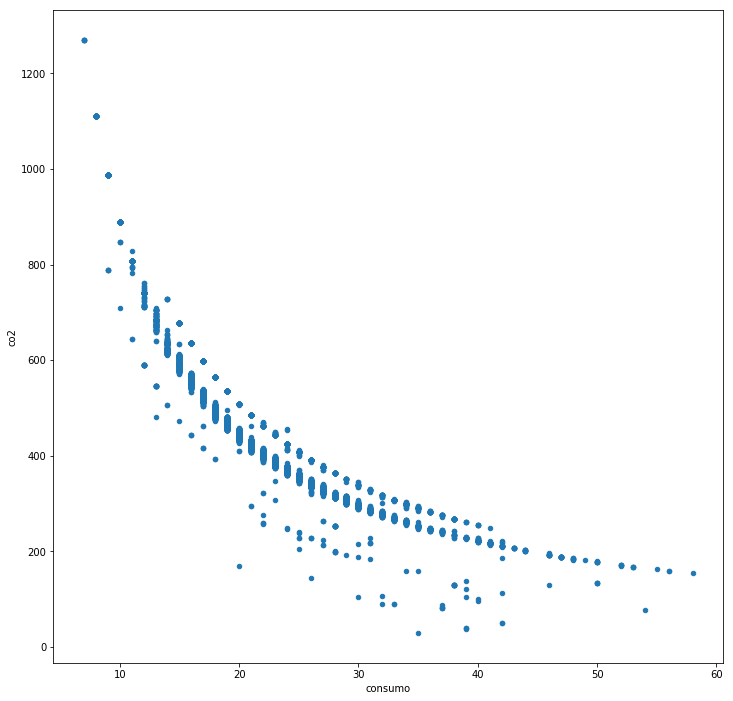

In [38]:
vehicles.plot.scatter(x="consumo",y="co2")


In the description of the dataset, it is seen that CO2 is measured in grams per mile, while consumption is measured in miles per gallon.

I have to convert the consumption to gallons per mile and so both variables are relative to the mile and we can compare them.

In [39]:
litros_por_galon =  3.78541

vehicles["consumo_litros_milla"] = litros_por_galon/ vehicles.consumo

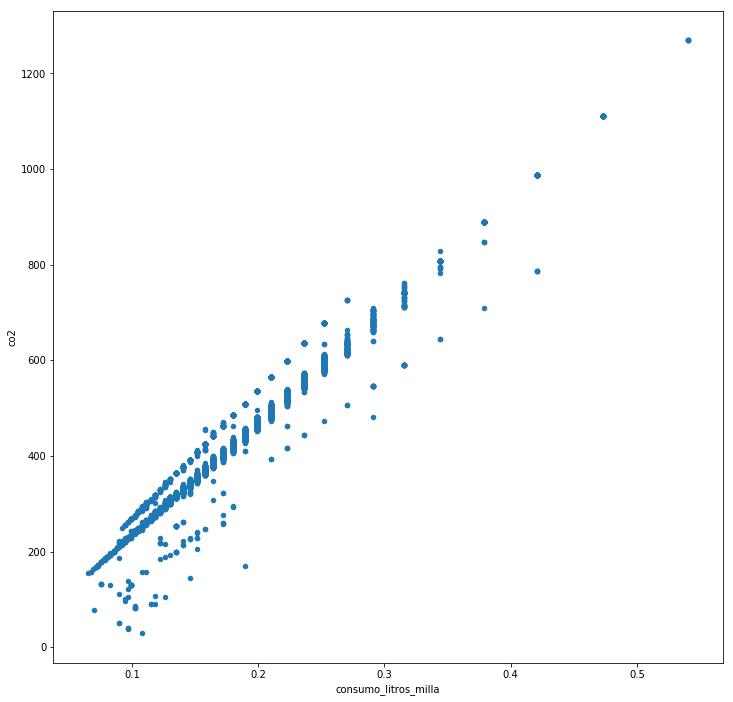

In [40]:
vehicles.plot.scatter(x="consumo_litros_milla",y="co2");


I recalculate the consumption levels with the new variable

In [41]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehicles['consumo_tipo'] = pd.qcut(vehicles['consumo_litros_milla'],
                                  5, labels=tipos_consumo)

vehicles.consumo_tipo.head()

0        alto
1    muy alto
2        alto
3    muy alto
4        alto
Name: consumo_tipo, dtype: category
Categories (5, object): [muy bajo < bajo < moderado < alto < muy alto]

In [42]:
vehicles.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


This already makes more sense! Now that I have the groups, I save the dataframe

In [43]:
vehicles.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

### Conclusion


- The variable `consumption` is defined in miles per gallon and the variable` co2` is defined as grams per mile. Since co2 is the main variable of the dataset, we have created the variable `consumption_litros_milla` defined as liters per mile to be able to compare with` co2`

### Export

Generally, a very extended format for saving data is csv. This, which is usually not a bad idea, is not recommended between steps when working with python and pandas.

CSV (or `Comma Separated Values`, that is, values ​​separated by comma), is a very simple format, which generally consists of a for row element, and each field separated by a comma.

The main problem that this has is that when saving data in csv all the data that pandas has been obtained on the dataframe is lost (for example, what type of variable is saved in each column, or what variables are categorical).

My recommendation is to use a native python format to save dataframes between steps, and save the final data to a format like csv, so that they can be shared with other people who do not use python.

The standard serialization format in Python (and serialization basically means saving a file to the hard disk) is `pickle`. Pandas can read and write to pickle without problems, and when reading a pickle file it is as if we had never closed the jupyter notebook, the dataframe will not have lost any property.

In [45]:
vehicles.to_pickle("../Data/vehiculos.3.variables_agrupadas.pkl")